# Adaptive Row Activation and Refresh
# an Experimental Approach to Mitigate RowHammer

Nevzat Umut Demirseren\
School of Computing\
University of North Florida\
Jacksonville, Florida\
nevzatumut2001@gmail.com

Required packages for the project (may require installation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt 
import math

#from %pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import label_binarize
from sklearn.utils import shuffle
from itertools import cycle

## Read and Analyze Data

### Read Data

In [2]:
output_no_mitigation = pd.read_csv('../outputs/output_no_mitigation.csv')

In [3]:
output_target_row_refresh = pd.read_csv('../outputs/output_target_row_refresh.csv')

In [4]:
output_probabilistic_adjacent_row_activation = pd.read_csv('../outputs/output_probabilistic_adjacent_row_activation.csv')

### Display Data

For the simulation, rows 3 and 5 are chosen as the aggressor rows and 4 as the victim row

In [8]:
display(output_no_mitigation)

,real_time,simulation_time_ns,adjacent_access_count_of_victim,flip_count
0,0,60,2,0
1,1,3605,122,0
2,2,7432,252,0
3,3,11273,382,0
4,4,15102,512,0
...,...,...,...,...
115,115,433759,14704,1
116,116,437517,14832,1
117,117,441299,14960,1
118,118,445137,15090,1


In [9]:
display(output_target_row_refresh)

,real_time,simulation_time_ns,adjacent_access_count_of_victim,trr_count,flip_count
0,0,89,2,0,0
1,1,5748,128,0,0
2,2,11050,248,0,0
3,3,16544,370,0,0
4,4,22260,498,0,0
...,...,...,...,...,...
115,115,655117,14712,1,1
116,116,660909,14842,1,1
117,117,666702,14972,1,1
118,118,671980,15090,1,1


In [10]:
display(output_probabilistic_adjacent_row_activation)

,real_time,simulation_time_ns,adjacent_access_count_of_victim,para_count,flip_count
0,0,63,2,0,0
1,1,4115,126,0,0
2,2,8355,256,0,0
3,3,12574,386,0,0
4,4,16859,516,1,0
...,...,...,...,...,...
115,115,480588,14752,32,1
116,116,484793,14882,32,1
117,117,488951,15010,32,1
118,118,492952,15132,33,1


### Visualize Data

#### No Mitigations

Best fitting line: y = 0.03389785000527264 * x + 0.07978276622598733


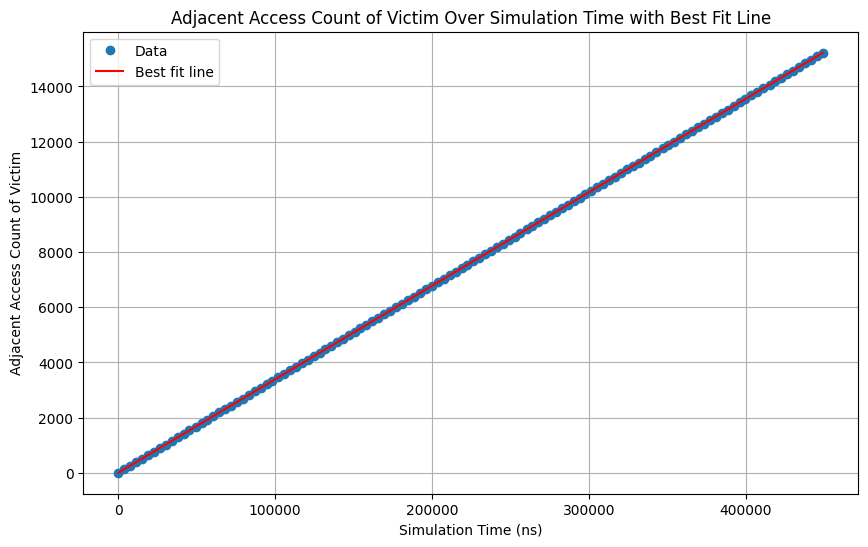

In [18]:
# Extract the columns
x = output_no_mitigation['simulation_time_ns']
y = output_no_mitigation['adjacent_access_count_of_victim']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


#### Target Row Refresh

Best fitting line: y = 0.02245752549946477 * x + -3.3883450593932634


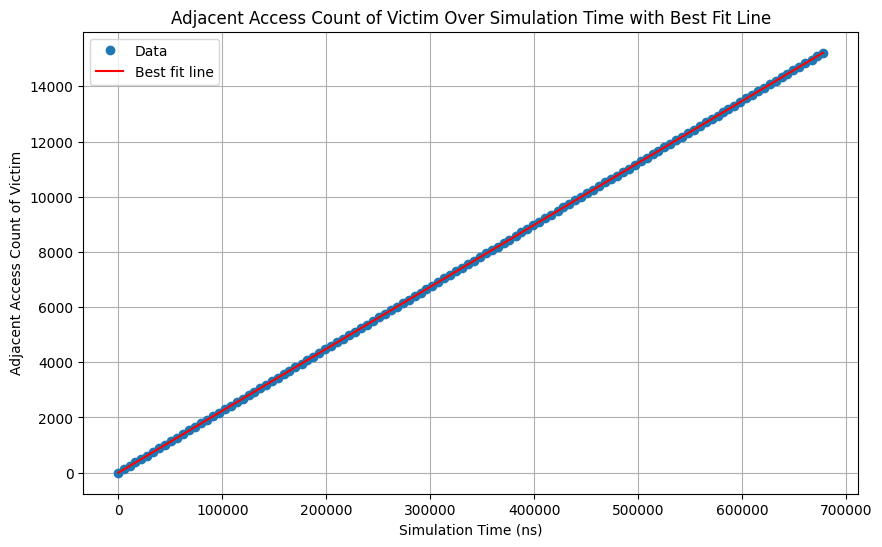

In [19]:
# Extract the columns
x = output_target_row_refresh['simulation_time_ns']
y = output_target_row_refresh['adjacent_access_count_of_victim']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#### Probabilistic Adjacent Row Activation

Best fitting line: y = 0.03070394739914531 * x + -2.303800119283208


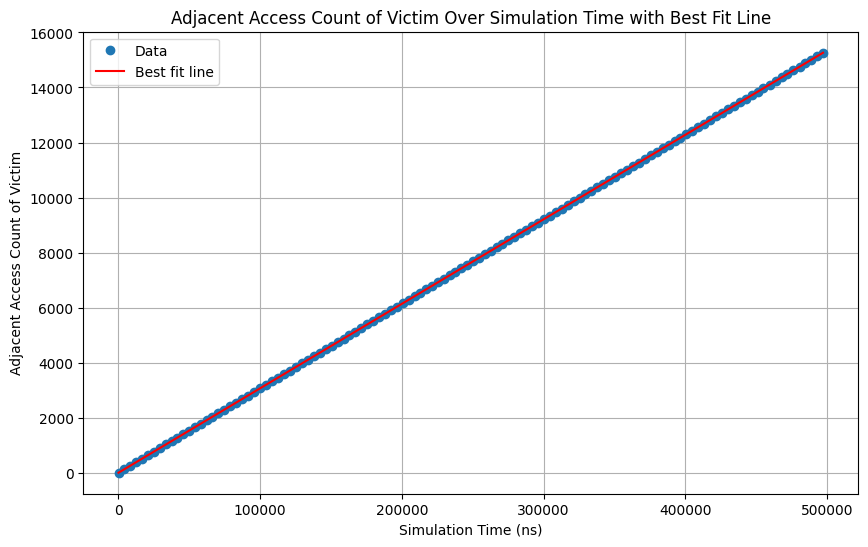

In [20]:
# Extract the columns
x = output_probabilistic_adjacent_row_activation['simulation_time_ns']
y = output_probabilistic_adjacent_row_activation['adjacent_access_count_of_victim']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()